In [2]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

### Load the Dataset

In [3]:
diabts_df=pd.read_excel("Team7_DataDynamos_cleaned_data.xlsx")

### Step 1: Check number of records, columns, and data types.

In [28]:
diabts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309392 entries, 0 to 309391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Patient ID                    309392 non-null  object        
 1   time                          309392 non-null  datetime64[ns]
 2   glucose                       309392 non-null  int64         
 3   calories                      309392 non-null  float64       
 4   heart_rate                    309392 non-null  int64         
 5   steps                         309392 non-null  int64         
 6   basal_rate                    309392 non-null  float64       
 7   bolus_volume_delivered        309392 non-null  float64       
 8   carb_input                    309392 non-null  float64       
 9   Age                           309392 non-null  int64         
 10  Gender                        309392 non-null  object        
 11  Race         

In [29]:
diabts_df.head(10)

,Patient ID,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input,Age,Gender,Race,Average Sleep Duration (hrs),Sleep Quality (1-10),% with Sleep Disturbances,hour_of_day,day_of_week,high_glucose
0,HUPA0001P,2018-06-13 18:40:00,332,6.36,82,34,0.09,0.0,0.0,34,Male,Other,6.3,4.5,80,18,2,1
1,HUPA0001P,2018-06-13 18:45:00,326,7.73,84,0,0.09,0.0,0.0,34,Male,Other,6.3,4.5,80,18,2,1
2,HUPA0001P,2018-06-13 18:50:00,330,4.75,81,0,0.09,0.0,0.0,34,Male,Other,6.3,4.5,80,18,2,1
3,HUPA0001P,2018-06-13 18:55:00,324,6.36,89,20,0.09,0.0,0.0,34,Male,Other,6.3,4.5,80,18,2,1
4,HUPA0001P,2018-06-13 19:00:00,306,5.15,92,0,0.08,0.0,0.0,34,Male,Other,6.3,4.5,80,19,2,1
5,HUPA0001P,2018-06-13 19:05:00,313,6.60,92,6,0.08,0.0,0.0,34,Male,Other,6.3,4.5,80,19,2,1
6,HUPA0001P,2018-06-13 19:10:00,312,10.14,91,48,0.08,0.0,0.0,34,Male,Other,6.3,4.5,80,19,2,1
7,HUPA0001P,2018-06-13 19:15:00,293,6.84,90,0,0.08,0.0,0.0,34,Male,Other,6.3,4.5,80,19,2,1
8,HUPA0001P,2018-06-13 19:20:00,303,5.23,89,0,0.08,0.0,0.0,34,Male,Other,6.3,4.5,80,19,2,1
9,HUPA0001P,2018-06-13 19:25:00,293,8.05,90,77,0.08,0.0,0.0,34,Male,Other,6.3,4.5,80,19,2,1


### Dataset Overview
Total Records: 309,392
Total Columns: 17
All columns are fully populated, no missing values.
High granularity: 309k+ records, multiple readings per patient per day (e.g., every 5 minutes).
Patient-level data: Patient ID allows grouping and patient-specific analysis.
Temporal coverage: time, date, hour_of_day, day_of_week
Glucose and factors: glucose (int), calories, heart_rate, steps, basal_rate 
Sleep and demographics: Age, Gender, Race, Sleep metrics 
Derived columns: high_glucose, hour_of_day, day_of_week

### Step 1.1: Summary Statistics

Get a statistical overview of numeric columns:
This gives count, mean, standard deviation, min, max, and quartiles for all numeric columns. Useful to spot extreme values or unusual distributions.

In [14]:
# Summary statistics for numeric columns
diabts_df.describe()

,time,glucose,calories,heart_rate,steps,basal_rate,Age,Average Sleep Duration (hrs),Sleep Quality (1-10),% with Sleep Disturbances,hour_of_day,day_of_week,high_glucose,date,hour,year
count,309392,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392,309392.000000,309392.000000
mean,2020-09-24 13:06:07.680159232,141.425040,8.813100,76.990381,30.825005,0.042001,53.332727,5.665791,5.916159,54.376972,11.522728,3.012027,0.215823,2020-09-24 01:07:15.827687936,11.522728,2020.218315
min,2018-06-13 18:40:00,40.000000,0.000000,32.000000,0.000000,0.000000,20.000000,5.000000,4.100000,30.000000,0.000000,0.000000,0.000000,2018-06-13 00:00:00,0.000000,2018.000000
25%,2020-01-30 11:00:00,100.000000,5.850000,65.000000,0.000000,0.000000,46.000000,5.500000,5.500000,50.000000,6.000000,1.000000,0.000000,2020-01-30 00:00:00,6.000000,2020.000000
50%,2020-10-31 16:52:30,132.000000,6.280000,75.000000,0.000000,0.060000,60.000000,5.500000,5.900000,60.000000,12.000000,3.000000,0.000000,2020-10-31 00:00:00,12.000000,2020.000000
75%,2021-07-27 06:31:15,173.000000,9.190000,86.000000,11.000000,0.070000,60.000000,5.900000,5.900000,60.000000,18.000000,5.000000,0.000000,2021-07-27 00:00:00,18.000000,2021.000000
max,2022-05-18 12:15:00,444.000000,106.350000,196.000000,842.000000,0.250000,74.000000,7.200000,7.900000,80.000000,23.000000,6.000000,1.000000,2022-05-18 00:00:00,23.000000,2022.000000
std,NaN,57.086123,6.930581,15.548773,84.981109,0.036557,12.421322,0.450037,0.976449,12.299519,6.924733,1.998757,0.411393,NaN,6.924733,1.132585


Glucose & activity range: Average glucose is ~141 mg/dL, ranging from 40 to 444 mg/dL; steps vary widely from 0 to 842 per record, showing high variability in physical activity.               
Calories, heart rate, basal rate: Mean calories ~8.8 kcal, heart rate ~77 bpm, basal rate ~0.042 U; some extreme outliers exist (calories up to 106, heart rate up to 196 bpm).                   
Sleep & demographics: Average sleep duration ~5.7 hrs, sleep quality ~5.9/10, % with sleep disturbances ~54%; age ranges from 20–74 years.            
Time features: Hour of day covers full 0–23 range, days of week 0–6; data spans 2018–2022, with most records concentrated 2020–2022.

### Step 2: Unique Patients and Record Counts

In [42]:
# Count records per patient and convert to DataFrame
patient_counts_df = diabts_df['Patient ID'].value_counts().reset_index()
patient_counts_df.columns = ['Patient ID', 'Record Count']

# Apply single color gradient
patient_counts_df.style.background_gradient(cmap='Blues', subset=['Record Count'])

,Patient ID,Record Count
0,HUPA0027P,165306
1,HUPA0026P,40605
2,HUPA0028P,25902
3,HUPA0001P,4096
4,HUPA0022P,4023
5,HUPA0025P,4006
6,HUPA0023P,3919
7,HUPA0018P,3895
8,HUPA0005P,3858
9,HUPA0007P,3857


Patient Record Distribution: The number of records per patient varies widely, from 2,290 up to 165,306, indicating uneven data contributions across patients.
High vs Low Data Contributors: A few patients (e.g., HUPA0027P, HUPA0026P) contribute the majority of the dataset, while many others have relatively sparse records, which may affect patient-level analyses.

### Step 3: provide a descriptive overview of the cohort’s demographics, sleep quality, and disturbance patterns.
Histograms visualize the distribution of numeric columns. Look for skewness, outliers, and typical ranges.
For categorical columns like Gender or Race, this shows how many samples are in each category, helping to identify imbalanced data.

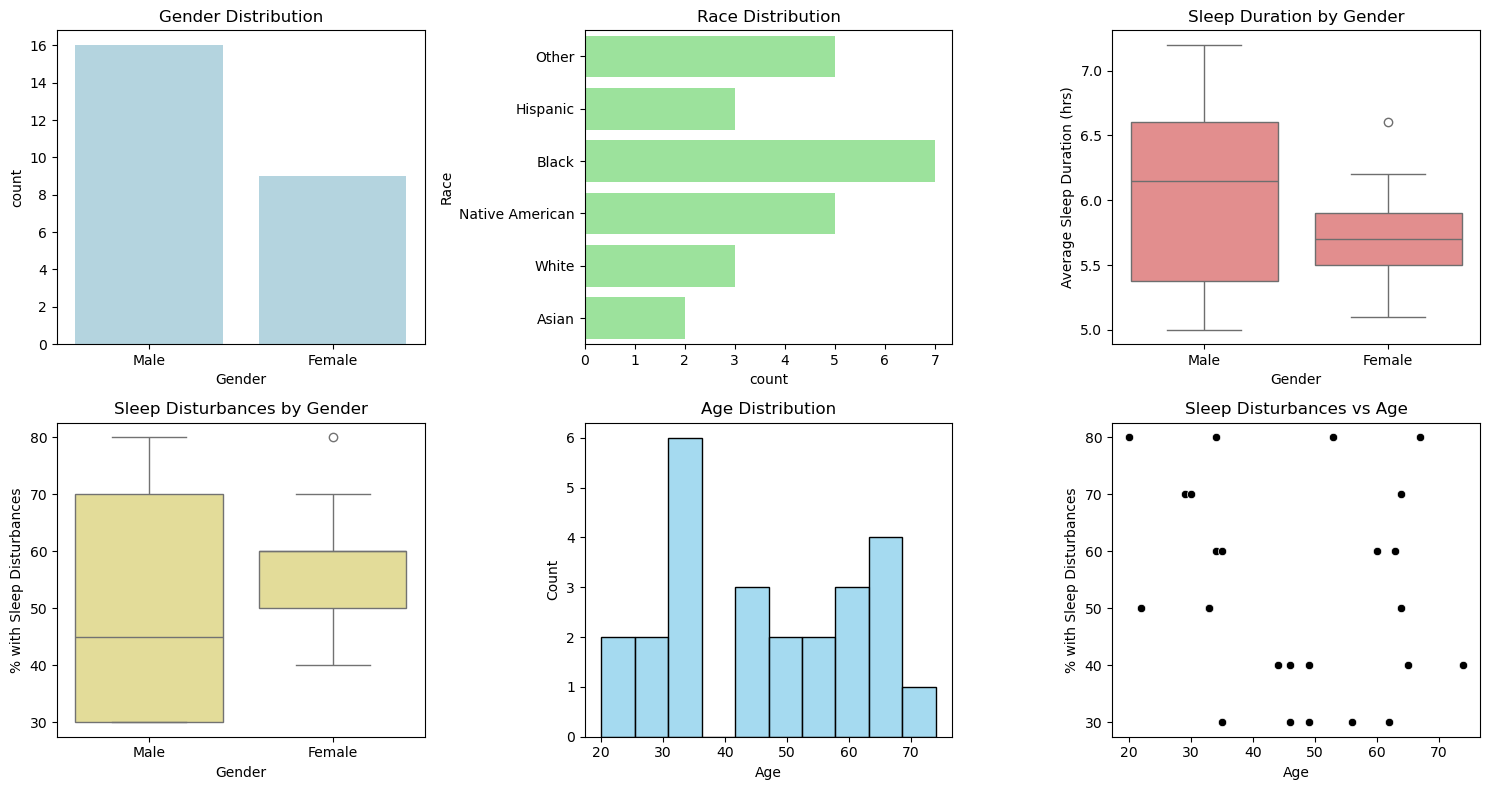

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
demo_summary = diabts_df[['Patient ID', 'Age', 'Gender', 'Race',
                          'Average Sleep Duration (hrs)', 
                          'Sleep Quality (1-10)', 
                          '% with Sleep Disturbances']].drop_duplicates()

# Set up figure with 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# 1. Gender distribution
sns.countplot(x='Gender', data=demo_summary, color='lightblue', ax=axes[0])
axes[0].set_title("Gender Distribution")

# 2. Race distribution
sns.countplot(y='Race', data=demo_summary, color='lightgreen', ax=axes[1])
axes[1].set_title("Race Distribution")

# 3. Sleep Duration by Gender
sns.boxplot(x='Gender', y='Average Sleep Duration (hrs)', data=demo_summary,
            color='lightcoral', ax=axes[2])
axes[2].set_title("Sleep Duration by Gender")

# 4. Sleep Disturbances by Gender
sns.boxplot(x='Gender', y='% with Sleep Disturbances', data=demo_summary,
            color='khaki', ax=axes[3])
axes[3].set_title("Sleep Disturbances by Gender")

# 5. Average Age
sns.histplot(demo_summary['Age'], bins=10, kde=False, color='skyblue', ax=axes[4])
axes[4].set_title("Age Distribution")

# 6. Sleep Disturbances vs Age
sns.scatterplot(x='Age', y='% with Sleep Disturbances', data=demo_summary, color='black', ax=axes[5])
axes[5].set_title("Sleep Disturbances vs Age")

plt.tight_layout()
plt.show()


### Step 4: Distribution Plots
Histograms for key numeric variables including glucose, calories, heart rate, steps, basal rate, age, carb intake, and bolus volume
Look for skewness, outliers, and typical ranges.

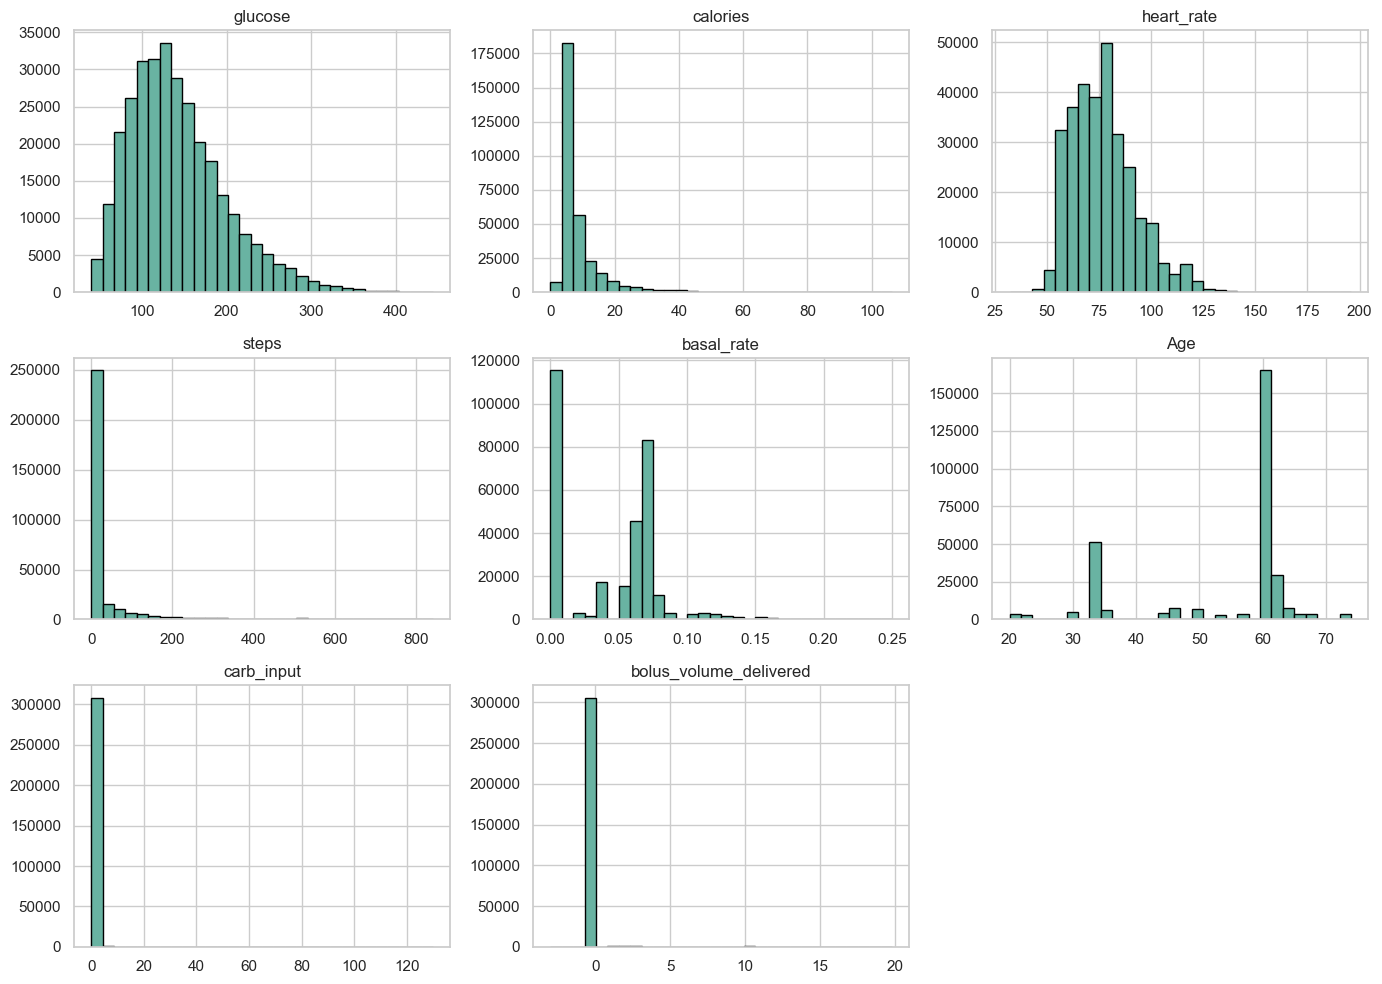

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns including carb and bolus
num_cols = ['glucose', 'calories', 'heart_rate', 'steps', 'basal_rate', 'Age', 'carb_input', 'bolus_volume_delivered']

# Set seaborn style
sns.set(style="whitegrid")

# Plot histograms
diabts_df[num_cols].hist(figsize=(14,10), bins=30, color='#69b3a2', edgecolor='black')
plt.tight_layout()
plt.show()

### Step 5: Correlation Analysis
Correlation analysis helps identify which variables are related. Strong correlations can be used in feature selection or engineering.
Interpretation guide
0.7 to 1.0 (or -0.7 to -1.0) → Strong correlation
0.4 to 0.7 (or -0.4 to -0.7) → Moderate correlation
0.2 to 0.4 (or -0.2 to -0.4) → Weak correlation
0.0 to 0.2 (or -0.0 to -0.2) → Very weak / negligible correlation

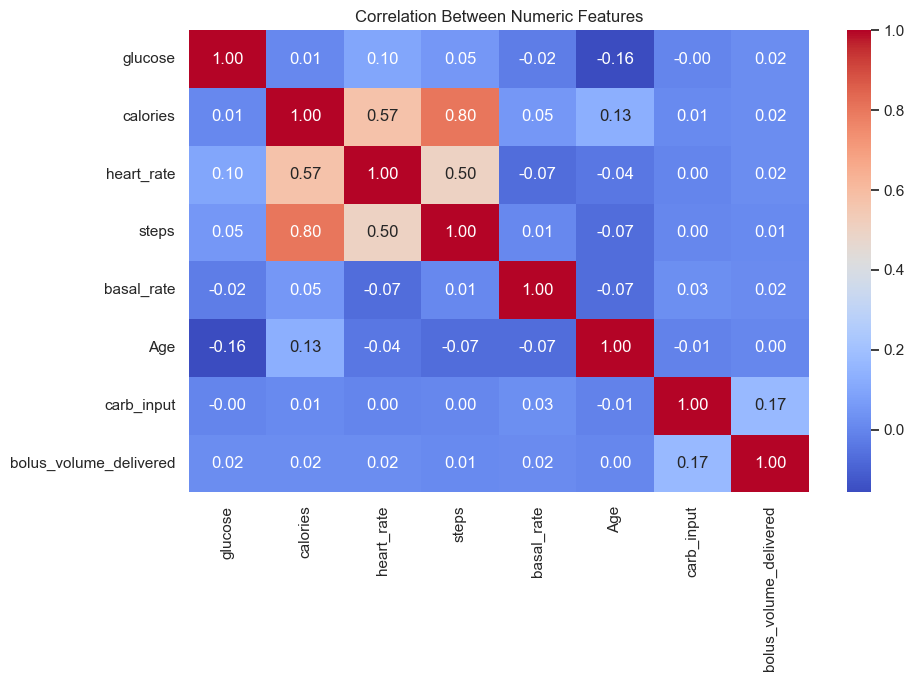

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns including carb and bolus
num_cols = ['glucose', 'calories', 'heart_rate', 'steps', 'basal_rate', 'Age', 'carb_input', 'bolus_volume_delivered']

# Correlation matrix
corr = diabts_df[num_cols].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

Calories ↔ Steps (0.80) → Strong positive correlation 💪
→ As steps increase, calories burned also increase (makes sense, since calories are directly tied to movement).

Heart rate ↔ Steps (0.50) → Moderate positive correlation
→ More steps generally increase heart rate, but not always one-to-one (resting heart rate, exercise intensity, etc. also play roles).

Calories ↔ Heart rate (0.57) → Moderate positive correlation
→ Higher heart rate tends to burn more calories, though not perfectly (depends on individual metabolism, effort level, etc.).

Other correlations (weak/very weak, close to 0)
→ Suggest there’s little to no linear relationship between those variables.

### Step 6: Understand Glucose Distribution
We extract the hour from the `time` column so that we can analyze glucose patterns by hour of the day.

Mean glucose: 141.43
Median glucose: 132.00
Standard deviation: 57.09


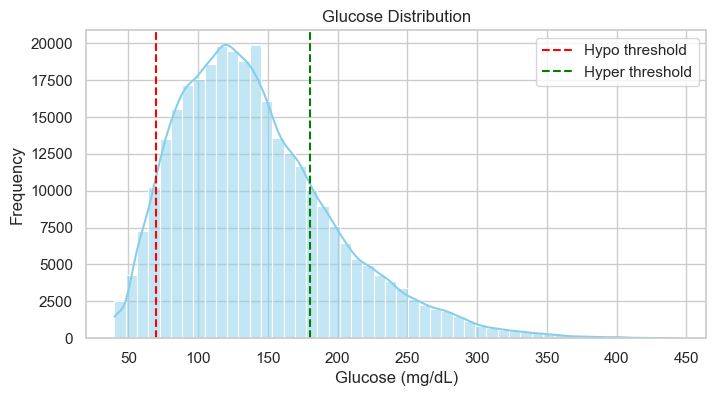

Glucose range counts:
 glucose
Normal    222577
Hyper      66774
Hypo       20041
Name: count, dtype: int64


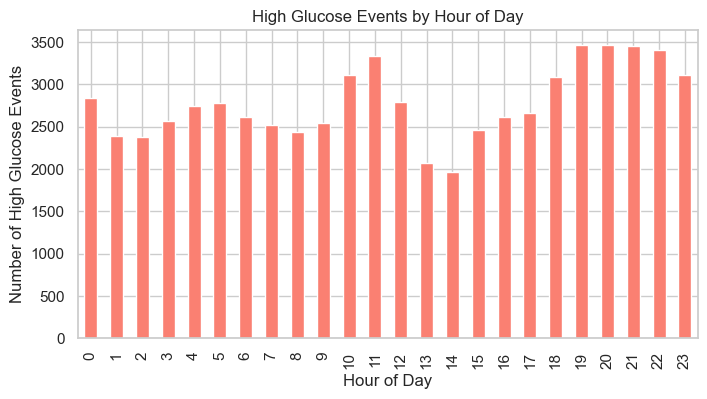

In [46]:
# 1. Overall glucose statistics
mean_glucose = diabts_df['glucose'].mean()
median_glucose = diabts_df['glucose'].median()
std_glucose = diabts_df['glucose'].std()

print(f"Mean glucose: {mean_glucose:.2f}")
print(f"Median glucose: {median_glucose:.2f}")
print(f"Standard deviation: {std_glucose:.2f}")

# Plot distribution
plt.figure(figsize=(8,4))
sns.histplot(diabts_df['glucose'], bins=50, kde=True, color='skyblue')
plt.axvline(70, color='red', linestyle='--', label='Hypo threshold')
plt.axvline(180, color='green', linestyle='--', label='Hyper threshold')
plt.title("Glucose Distribution")
plt.xlabel("Glucose (mg/dL)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Time in range analysis
tir_counts = diabts_df['glucose'].apply(
    lambda x: 'Hypo' if x < 70 else ('Normal' if x <= 180 else 'Hyper')
).value_counts()

print("Glucose range counts:\n", tir_counts)

# 3. High glucose events by hour
high_glucose_by_hour = diabts_df[diabts_df['glucose'] > 180].groupby('hour_of_day').size()
plt.figure(figsize=(8,4))
high_glucose_by_hour.plot(kind='bar', color='salmon')
plt.title("High Glucose Events by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of High Glucose Events")
plt.show()


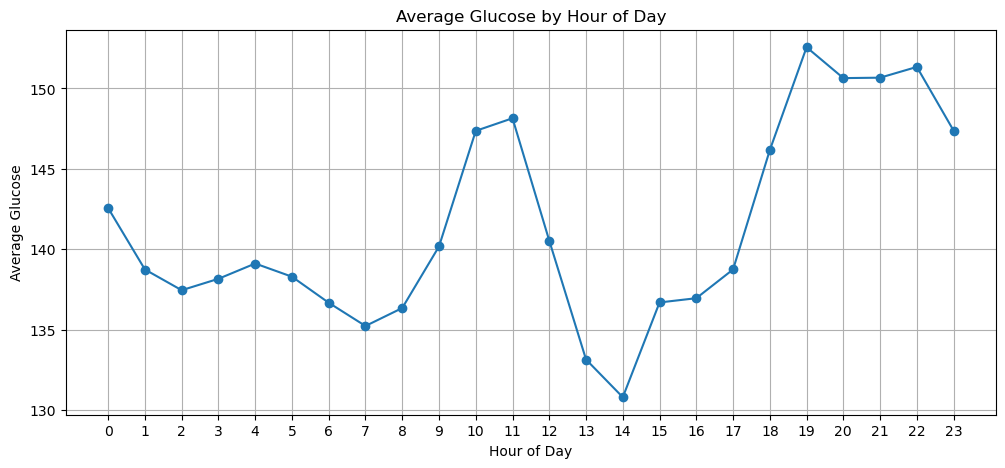

In [9]:
diabts_df['hour'] = diabts_df['time'].dt.hour
hourly_glucose = diabts_df.groupby('hour')['glucose'].mean()
plt.figure(figsize=(12,5))
hourly_glucose.plot(marker='o')
plt.title('Average Glucose by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Glucose')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


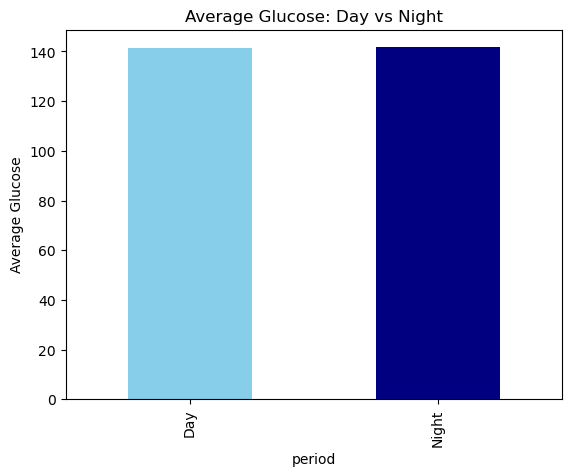

In [10]:
# Define daytime and nighttime
diabts_df['period'] = diabts_df['hour'].apply(lambda x: 'Day' if 6 <= x < 22 else 'Night')

# Group by period
period_glucose = diabts_df.groupby('period')['glucose'].mean()
period_glucose.plot(kind='bar', color=['skyblue','navy'])
plt.title('Average Glucose: Day vs Night')
plt.ylabel('Average Glucose')
plt.show()


year
2018     38692
2019     24037
2020    109620
2021    105120
2022     31923
Name: count, dtype: int64


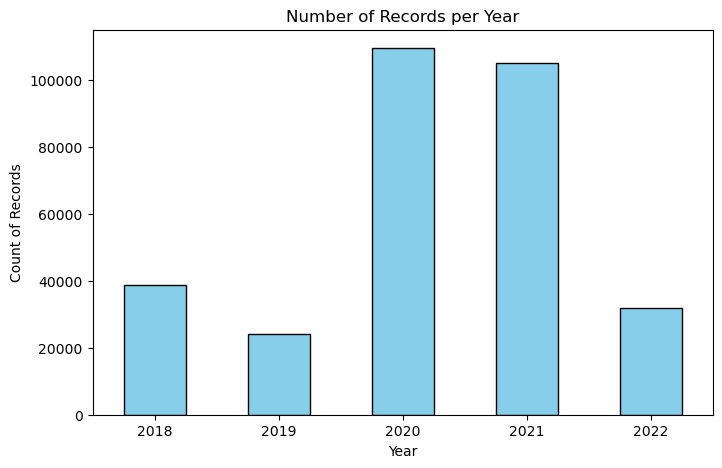

In [11]:
# Extract year from timestamp
diabts_df['year'] = diabts_df['time'].dt.year

# Count records per year
yearly_counts = diabts_df['year'].value_counts().sort_index()

print(yearly_counts)

# Plot distribution
plt.figure(figsize=(8,5))
yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Records per Year")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.xticks(rotation=0)
plt.show()


### Insights
The average glucose across all patients is 141.43 mg/dL, slightly above the midpoint of the normal range.

The median glucose of 132 mg/dL suggests a slight right skew (some high glucose values pulling the mean up).

Normal glucose values dominate the dataset (~72%), while hyperglycemia occurs in ~22% of readings and hypoglycemia in ~6%, indicating most readings are within target range but with notable high and low excursions.

### Step 7: Check the distribution of data across years.                 
Filter Data for year 2020 and 2021 and examin quarterly Glucose trend

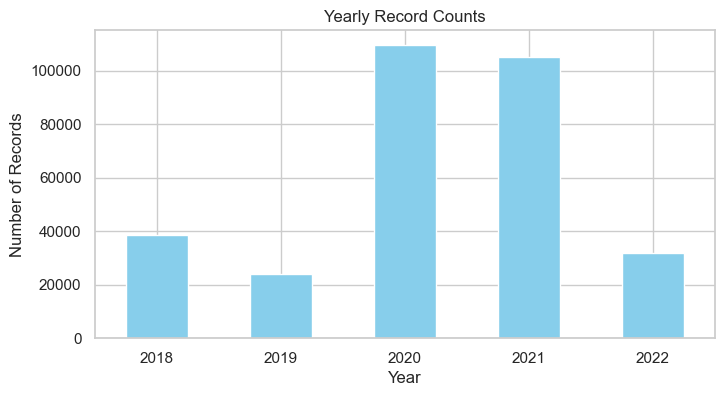

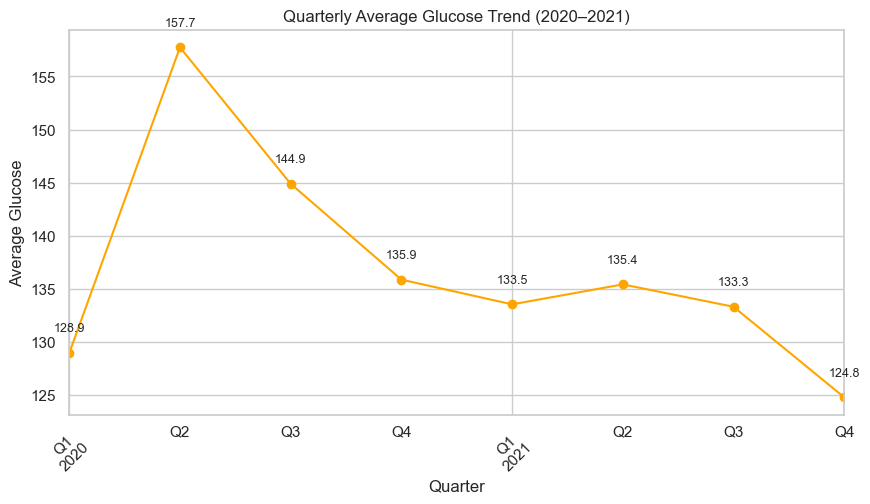

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Yearly distribution of records
yearly_counts = diabts_df['time'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8,4))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title("Yearly Record Counts")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)
plt.show()

# Step 2: Filter data for 2020 and 2021
df_2020_2021 = diabts_df[diabts_df['time'].dt.year.isin([2020, 2021])].copy()

# Step 3: Create a Year-Quarter column
df_2020_2021['year_quarter'] = df_2020_2021['time'].dt.to_period('Q')

# Step 4: Group by Year-Quarter and calculate average glucose
quarterly_glucose = df_2020_2021.groupby('year_quarter')['glucose'].mean()

# Step 5: Plot quarterly glucose trends
plt.figure(figsize=(10,5))
quarterly_glucose.plot(marker='o', color='orange')
plt.title('Quarterly Average Glucose Trend (2020–2021)')
plt.xlabel('Quarter')
plt.ylabel('Average Glucose')
plt.xticks(rotation=45)
plt.grid(True)

# Add value labels
for x, y in zip(quarterly_glucose.index.astype(str), quarterly_glucose.values):
    plt.text(x, y+2, f"{y:.1f}", ha='center', fontsize=9)

plt.show()


Inference for 2020: A sharp mid-year spike (Q2) but recovery by year-end. Might indicate seasonal/lifestyle impact or a cohort-wide event (pandemic lockdown changes, exercise/sleep disruption).
Inference for 2021: Much more stable trend across the year, with gradual improvement. Suggests patients had better glucose management compared to 2020.
Overall Insights
2020: Volatility in glucose (big spike mid-year).
2021: Much more controlled and steady glucose levels.
Hypothesis: Patients may have adapted to lifestyle/treatment changes after disruptions in 2020.

### Step 8: To understand whether patients consume more carbs at specific times of the day, we categorized hours into meal periods:            
Breakfast → 6 AM – 11 AM                      
Lunch → 11 AM – 3 PM                      
Dinner → 5 PM – 9 PM                        
Other → All other hours                
We then calculated the average carb input for each meal period across all patients. visualizes the average carb input across different meal periods:

meal_period
Lunch        0.091454
Breakfast    0.058602
Dinner       0.044511
Other        0.038992
Name: carb_input, dtype: float64


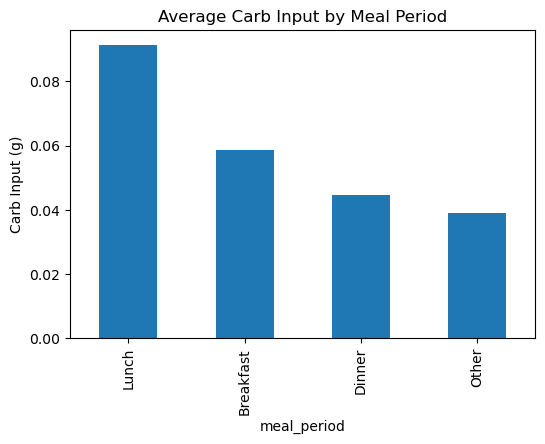

In [31]:
# Extract meal-time windows
def meal_period(hour):
    if 6 <= hour < 11:
        return "Breakfast"
    elif 11 <= hour < 15:
        return "Lunch"
    elif 17 <= hour < 21:
        return "Dinner"
    else:
        return "Other"

diabts_df["meal_period"] = diabts_df["hour_of_day"].apply(meal_period)

# Average carb input by meal period
carb_by_meal = diabts_df.groupby("meal_period")["carb_input"].mean().sort_values(ascending=False)
print(carb_by_meal)

# Plot
carb_by_meal.plot(kind="bar", figsize=(6,4), title="Average Carb Input by Meal Period")
plt.ylabel("Carb Input (g)")
plt.show()


Insights:               
Patients tend to consume more carbs during Lunch followed by Breakfast followed by Dinner and Other times.                                     
The "Other" category likely includes snacks or nighttime meals, which show lower carb intake.

### Step 9: The code calculates the average bolus insulin delivered for each meal period and visualizes it as a pie chart.

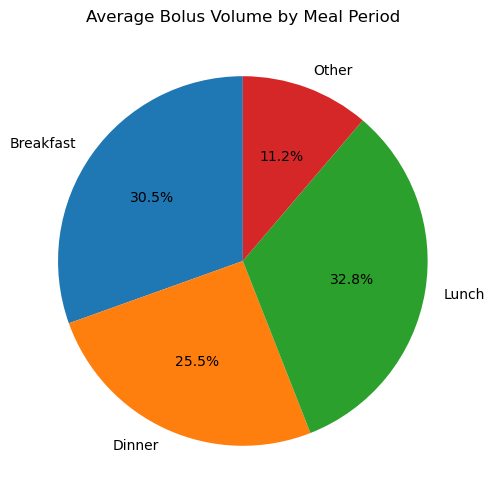

In [35]:
import matplotlib.pyplot as plt

# Group by meal period and calculate mean bolus volume
bolus_meal = diabts_df.groupby("meal_period")["bolus_volume_delivered"].mean()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(bolus_meal, labels=bolus_meal.index, autopct='%1.1f%%', startangle=90)
plt.title("Average Bolus Volume by Meal Period")
plt.show()

Lunch (32.8 units) 👉 Highest average bolus requirement. Likely because lunch tends to be the largest meal in this population, with higher carb intake.

Breakfast (30.5 units) 👉 Second highest. Morning insulin resistance (the “dawn phenomenon”) could also contribute to needing more insulin for breakfast.

Dinner (25.5 units) 👉 Moderate, but still significant—patients require a fair bolus, probably due to evening meals, but slightly less than breakfast/lunch.

Other times (11.2 units) 👉 Much lower. This represents correction boluses or snacks outside the main meals.

### Step 10: Visualize steps distribution across patients

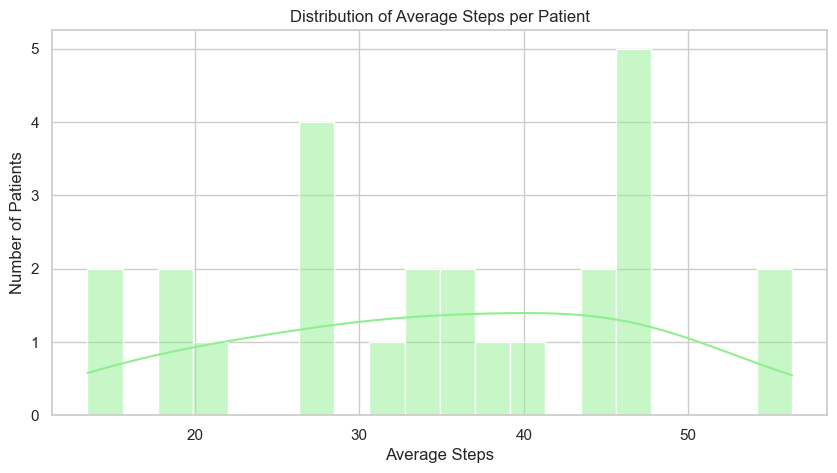

Steps per patient summary:
count    25.000000
mean     35.164700
std      12.201848
min      13.479264
25%      27.411141
50%      35.654740
75%      45.729184
max      56.307030
Name: steps, dtype: float64


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by patient and calculate average daily steps
avg_steps_per_patient = diabts_df.groupby('Patient ID')['steps'].mean().sort_values()

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(avg_steps_per_patient, bins=20, color='lightgreen', kde=True)
plt.title("Distribution of Average Steps per Patient")
plt.xlabel("Average Steps")
plt.ylabel("Number of Patients")
plt.show()

# Optional: Print summary statistics
print("Steps per patient summary:")
print(avg_steps_per_patient.describe())
